<a href="https://colab.research.google.com/github/JTWindshaker/predictColumnModel/blob/main/Arboles_Columna_Vertebral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje automático para conjunto de datos de columna vertebral**

Este conjunto de datos biomédicos fue elaborado por el Dr. Henrique da Mota durante un período de residencia médica en Lyon, Francia.

Cada paciente en el conjunto de datos está representado por seis atributos biomecánicos derivados de la forma y orientación de la pelvis y la columna lumbar (en este orden):

incidencia pélvica, inclinación pélvica, ángulo de lordosislumbar, pendiente sacra, radio pélvico y Grado de espondilolistesis. </p>
Se utiliza la siguiente convención para las etiquetas de clase: DH (hernia de disco), espondilolistesis (SL), normal (NO) y anormal (AB).

![imagen](https://static.wixstatic.com/media/75901e_827886c2dcfb4c30bb3614867919183c~mv2.jpg)

En este ejercicio, solo nos centramos en una tarea de clasificación binaria NO=0 y AB=1.

[Descargue el conjunto de datos](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column) de la columna vertebral desde:

In [ ]:
#Importamos todas las librerías necesarias para el modelo
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns


import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
from scipy.io import arff


#importo los modelos
from sklearn import tree
from sklearn.model_selection import train_test_split

#Plotear el arbol de decisión
from sklearn.tree import plot_tree

#importo las métricas

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc


In [ ]:
#Cargamos el zip y extraemos todo. Revisar los archivos
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

In [ ]:
#Cargamos el archivo y creamos el data frame
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [ ]:
df.shape

(310, 7)

In [ ]:
df['class'].value_counts() #datos

,count
class,
b'Abnormal',210
b'Normal',100


In [ ]:
#Cambiamos el nombre de las columnas
columns_name = ['incidencia pélvica', 'inclinación pélvica', 'ángulo de lordosis lumbar',
                'pendiente sacra', 'radio pélvico', 'grado de espondilolistesis', 'clase']
df.columns = columns_name
df.head()

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [ ]:
df

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [ ]:
#Verificamos la cantidad de datos unicos de la clase
df['clase'].value_counts() #Forma de llamar uno (Se usa para propiedades con espacios)
df.clase.value_counts() #Forma de llamar dos

,count
clase,
b'Abnormal',210
b'Normal',100


In [ ]:
df.clase.unique()

array([b'Abnormal', b'Normal'], dtype=object)

In [ ]:
# Convertir los bytes en strings
df['clase'] = df['clase'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Reemplazar 'Abnormal' por 0 y 'Normal' por 1
df['clase'] = df['clase'].replace({"Abnormal": 0, "Normal": 1})
df.to_csv('/content/column_2C.csv', index = False)

In [ ]:
len(df)

310

In [ ]:
df

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [ ]:
df.describe()

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,clase
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,59.902477,17.439431,51.865035,42.463046,118.117229,24.684656,0.325733
std,16.218656,9.906213,18.589185,12.371724,13.179166,30.030007,0.469413
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.408313,10.674279,36.839993,33.277979,110.915740,1.582976,0.000000
50%,58.521623,16.297915,49.349262,42.324573,118.363389,11.211523,0.000000
75%,72.452148,21.933666,63.000000,52.127231,125.536899,40.446654,1.000000
max,96.657315,49.431864,125.742385,78.794052,163.071041,148.753711,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incidencia pélvica          310 non-null    float64
 1   inclinación pélvica         310 non-null    float64
 2   ángulo de lordosis lumbar   310 non-null    float64
 3   pendiente sacra             310 non-null    float64
 4   radio pélvico               310 non-null    float64
 5   grado de espondilolistesis  310 non-null    float64
 6   clase                       310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


<Axes: xlabel='incidencia pélvica', ylabel='inclinación pélvica'>

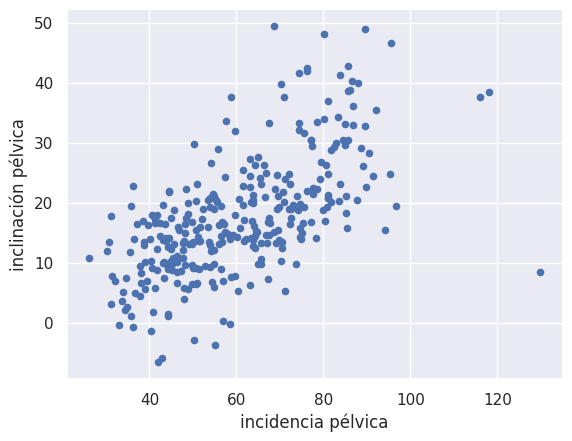

In [ ]:
df.plot.scatter(x='incidencia pélvica',y='inclinación pélvica')

<Axes: xlabel='incidencia pélvica', ylabel='inclinación pélvica'>

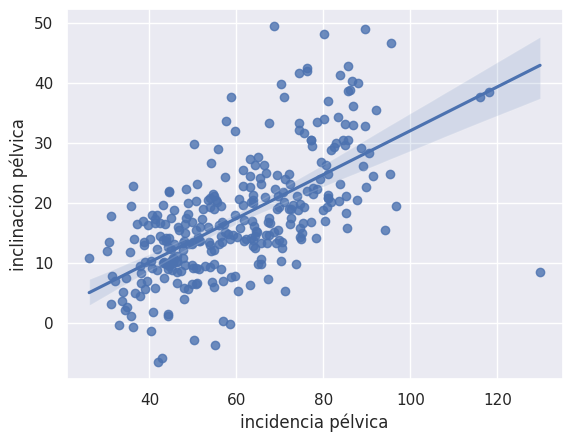

In [ ]:
import seaborn as sns

# Equivalent to:
sns.regplot(x='incidencia pélvica',y='inclinación pélvica', data = df)

,count
clase,
0,210
1,100


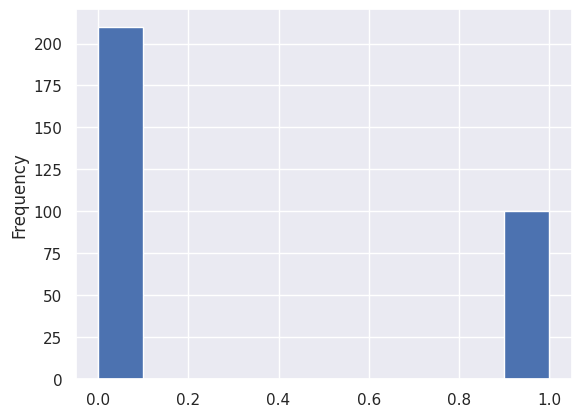

In [ ]:
df.clase.plot.hist() #graficar en un histograma
pd.value_counts(df.clase) #datos

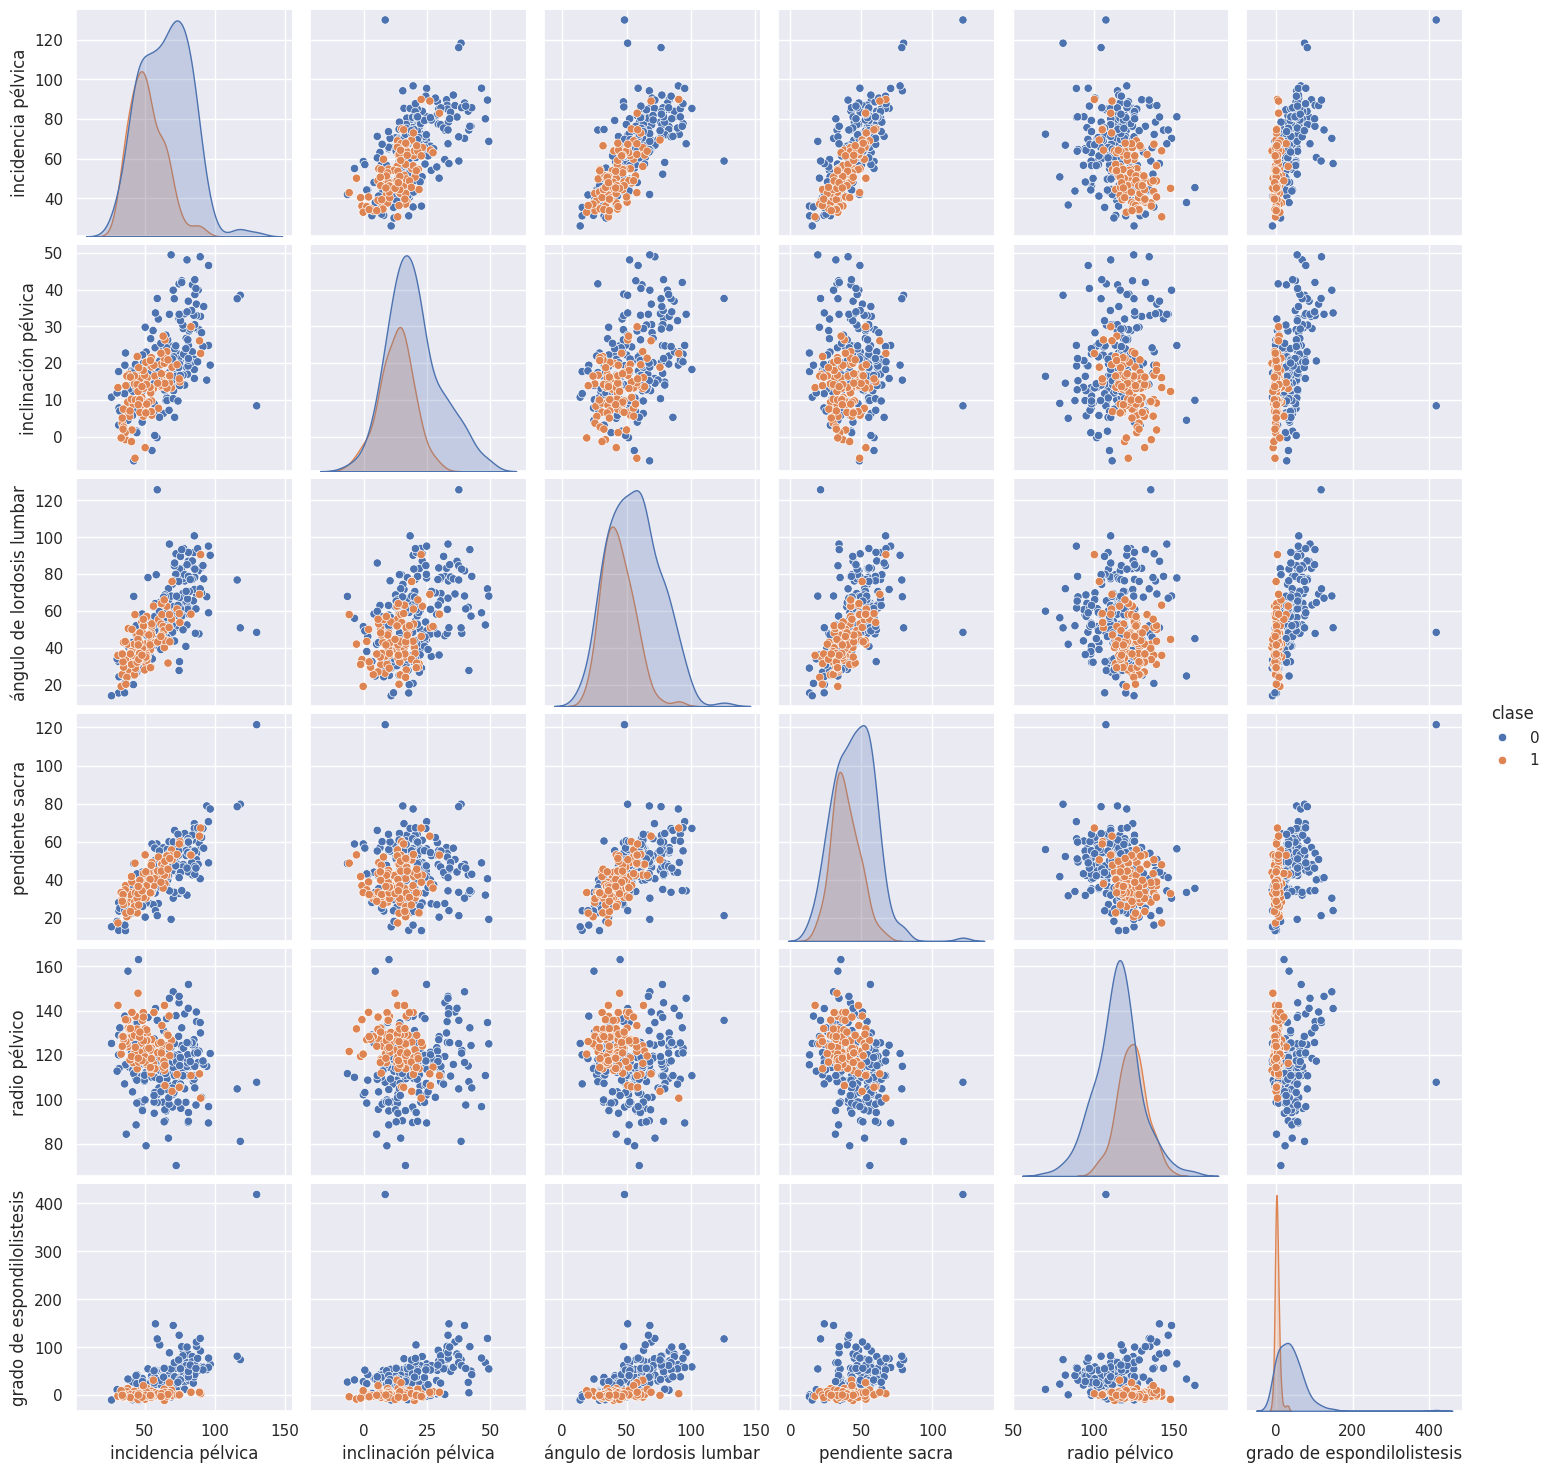

In [ ]:
sns.set()
sns.pairplot(df, hue = 'clase',vars=['incidencia pélvica', 'inclinación pélvica',
                                     'ángulo de lordosis lumbar','pendiente sacra', 'radio pélvico',
                                     'grado de espondilolistesis'])
plt.show()

<Axes: ylabel='incidencia pélvica'>

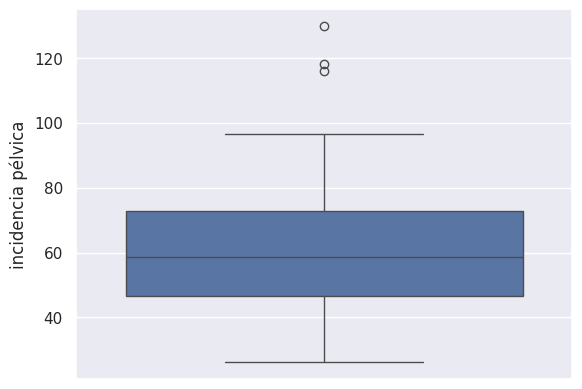

In [ ]:
sns.boxplot(y = 'incidencia pélvica', data = df)

<Axes: >

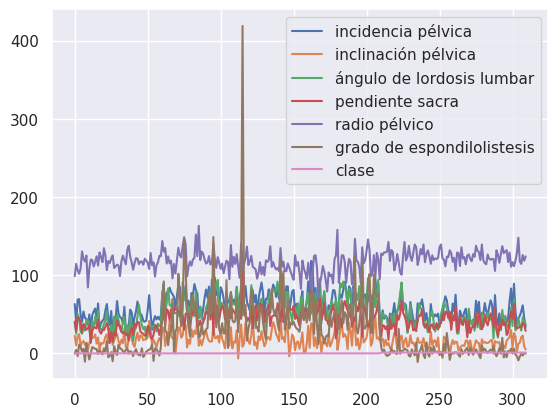

In [ ]:
df.plot()

In [ ]:
df.columns

Index(['incidencia pélvica', 'inclinación pélvica',
       'ángulo de lordosis lumbar', 'pendiente sacra', 'radio pélvico',
       'grado de espondilolistesis', 'clase'],
      dtype='object')

In [ ]:
df=df[df['incidencia pélvica']<100]
df.shape

(307, 7)

<Axes: ylabel='grado de espondilolistesis'>

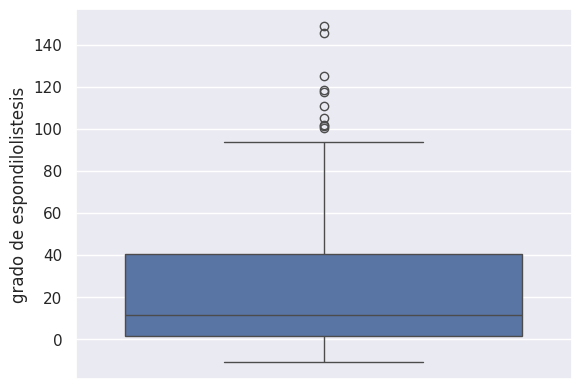

In [ ]:
sns.boxplot(y = 'grado de espondilolistesis', data = df)

In [ ]:
columnas=df.select_dtypes(include='float').columns
columnas

Index(['incidencia pélvica', 'inclinación pélvica',
       'ángulo de lordosis lumbar', 'pendiente sacra', 'radio pélvico',
       'grado de espondilolistesis'],
      dtype='object')

Text(0.5, 0.98, 'Box Plot de todos los features')

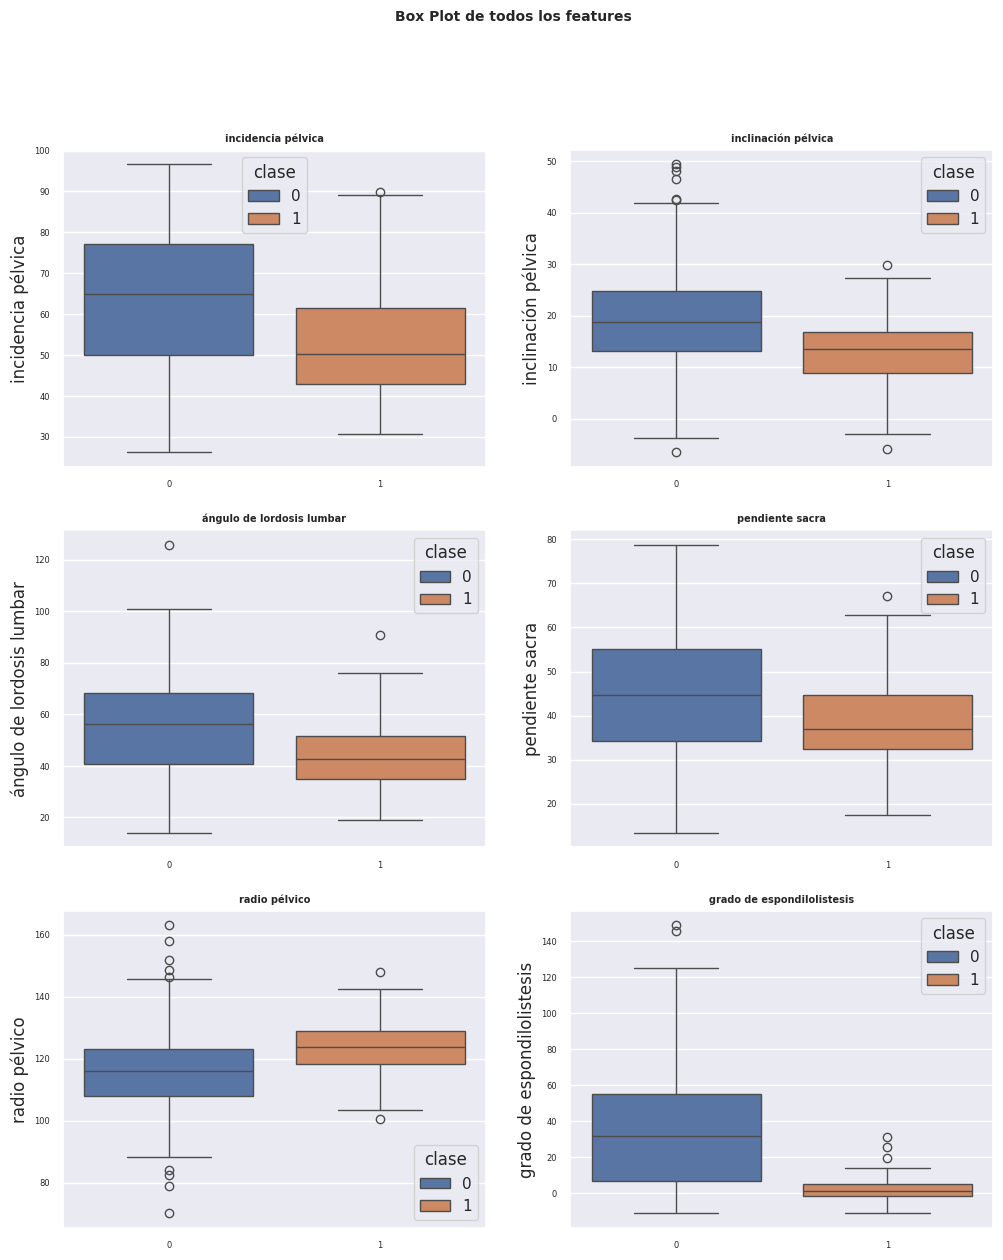

In [ ]:
#Definir los parámetros de la grafica

fig,axes=plt.subplots(nrows=3, ncols=2,figsize=(12,14))
axes=axes.flat

#recorrer todas las columnas
for i,columna in enumerate(columnas):
  sns.boxplot(x = 'clase', y = columna, data = df, hue = 'clase',ax=axes[i])
  axes[i].set_title(columna, fontsize=7,fontweight="bold")
  axes[i].tick_params(labelsize=6)
  axes[i].set_xlabel("")


fig.suptitle("Box Plot de todos los features", fontsize=10,fontweight="bold")


In [ ]:
cuantiles_ip=df['incidencia pélvica'].quantile([0.25,0.5,0.75])
Q1=cuantiles_ip[0.25]
Q3=cuantiles_ip[0.75]
IQR=Q3-Q1
bigotesuper=Q3+(IQR*1.5)
bigoteinfer=Q1-(IQR*1.5)
print(bigotesuper,bigoteinfer)

111.5179002975 7.342560797499992


In [ ]:
#flitra dataframe con una o mas condiciones
#df[df["columna"]>condicon]
df[df['incidencia pélvica']>bigotesuper]

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,clase


In [ ]:
dfc=df.copy()

In [ ]:
dfc=dfc[dfc['incidencia pélvica']<=bigotesuper]

In [ ]:
len(df)

307

In [ ]:
df.isna().sum()

,0
incidencia pélvica,0
inclinación pélvica,0
ángulo de lordosis lumbar,0
pendiente sacra,0
radio pélvico,0
grado de espondilolistesis,0
clase,0


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

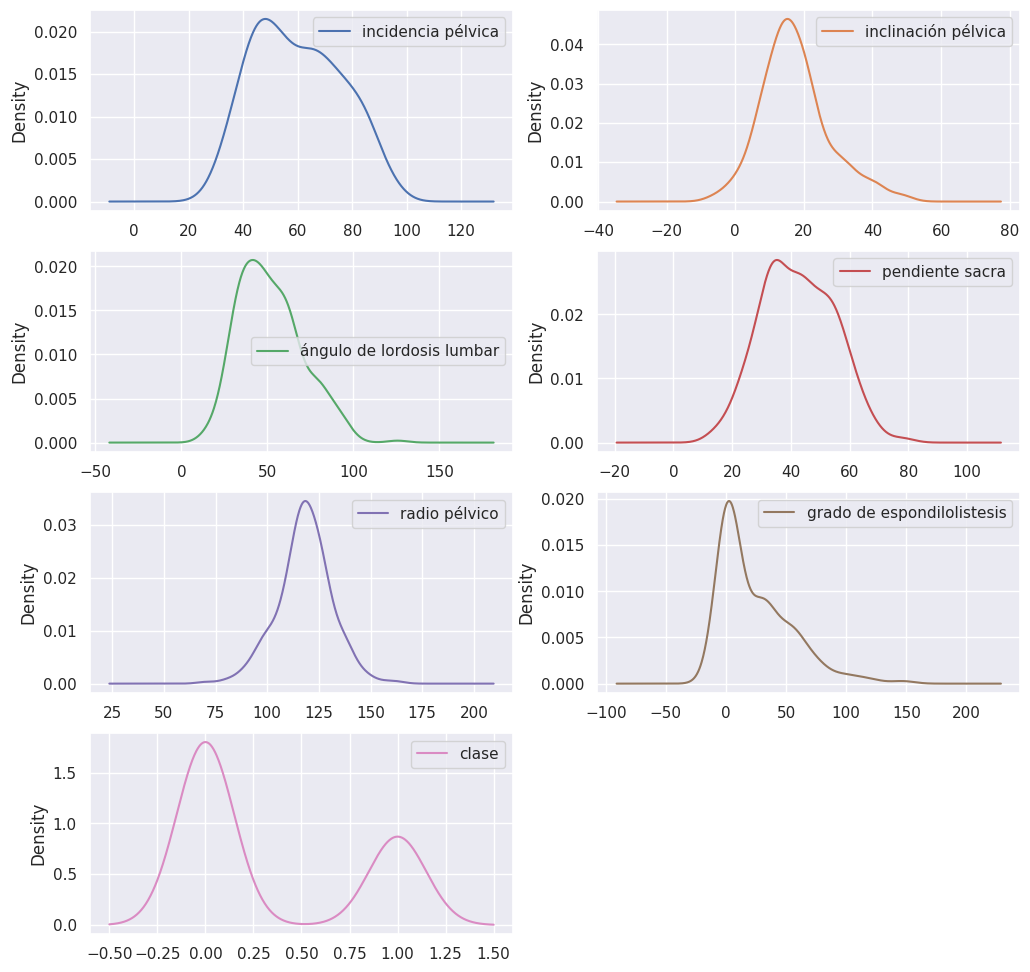

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,2), figsize=(12,12), sharex=False)

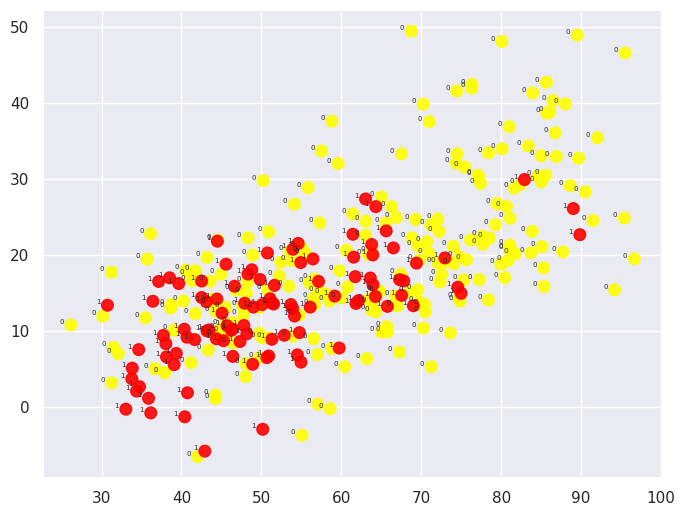

In [ ]:
tupla=df[["clase","incidencia pélvica","inclinación pélvica"]].to_records(index=False).tolist()
plt.figure(figsize=(8,6))
plt.subplots_adjust(bottom=0.1)

#Dibuja los puntos
color = np.where(df.clase==0, "yellow", "red")
plt.scatter(df["incidencia pélvica"],df["inclinación pélvica"], label='Posición', s=70, c=color,alpha=0.9)

#Le pone el label o etiqueta a cada punto
for label, x,y in tupla:
  plt.annotate(
      label,
      fontsize=5,
      xy=(x,y), xytext=(-5, -0),
      textcoords='offset points', ha='right',va='bottom'
  )

In [ ]:
df.shape

(307, 7)

In [ ]:
import ipywidgets as widgets
colors = np.where(df["clase"]== 0, "green", "red")
def angulo (x,y):
#Le pone el label o etiqueta a cada punto
  fig = plt.figure(figsize=(9,10))
  ax = fig.add_subplot(projection = '3d')
  # 3D scatter plot
  ax.scatter(df["incidencia pélvica"],df["inclinación pélvica"], df['ángulo de lordosis lumbar'], c = colors, marker="*")
  ax.fontsize=5,
  ax.view_init(x,y)
  ax.set_xlabel("incidencia pélvica")
  ax.set_ylabel("inclinación pélvica")
  ax.set_zlabel('ángulo de lordosis lumbar')
  plt.show()

grafico= widgets.interact(angulo,x=[60,-90,45,30,0, 30,45, 90], y=[60,-90,45,30,0, 30,45, 90])

# import plotly.express as px
# import pandas as pd
# import numpy as np

# # Supongamos que tienes un DataFrame llamado df con estas columnas:
# # 'incidencia pélvica', 'inclinación pélvica', 'ángulo de lordosis lumbar' y 'clase'.
# # Aquí hay un ejemplo de creación del DataFrame.
# np.random.seed(42)
# df = pd.DataFrame({
#     "incidencia pélvica": np.random.uniform(40, 70, 100),
#     "inclinación pélvica": np.random.uniform(10, 40, 100),
#     "ángulo de lordosis lumbar": np.random.uniform(20, 50, 100),
#     "clase": np.random.choice([0, 1], 100)
# })

# # Colores según la clase
# df["color"] = np.where(df["clase"] == 0, "green", "red")

# # Creación del gráfico interactivo con Plotly
# fig = px.scatter_3d(
#     df,
#     x="incidencia pélvica",
#     y="inclinación pélvica",
#     z="ángulo de lordosis lumbar",
#     color="clase",
#     color_discrete_map={0: "green", 1: "red"},
#     symbol="clase",
#     title="Gráfica 3D interactiva"
# )

# # Personalización de etiquetas
# fig.update_layout(
#     scene=dict(
#         xaxis_title="Incidencia Pélvica",
#         yaxis_title="Inclinación Pélvica",
#         zaxis_title="Ángulo de Lordosis Lumbar"
#     )
# )

# # Mostrar el gráfico interactivo
# fig.show()

interactive(children=(Dropdown(description='x', options=(60, -90, 45, 30, 0, 30, 45, 90), value=60), Dropdown(…

In [ ]:
df.shape

(307, 7)

## Crear dataframe de Features y de Label

In [ ]:
#Datos de prueba y los datos entrenamiento con un división 80%
X=df.drop("clase", axis=1) #selecciono las caracteristicas
y=df["clase"]#selecciono la columna target

In [ ]:
y

,clase
0,0
1,0
2,0
3,0
4,0
...,...
305,1
306,1
307,1
308,1


# Crear modelo de Machine Learning

In [ ]:
#Separamos la data de entrenamiento y de testing
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=454, stratify=df.clase) #o test_size=0.2

In [ ]:
y_train.value_counts()

,count
clase,
0,165
1,80


In [ ]:
y_test.value_counts()

,count
clase,
0,42
1,20


In [ ]:
len(X_train), len(X_test)

(245, 62)

In [ ]:
y


,clase
0,0
1,0
2,0
3,0
4,0
...,...
305,1
306,1
307,1
308,1


In [ ]:
#Declarar la instancia del modelo o Crear el modelo para Abrol de decisión
modeloArbol=tree.DecisionTreeClassifier(criterion='gini', max_depth=5,
                                     min_samples_split=10,
                                     min_samples_leaf=5, random_state=444)

In [ ]:
#Entrenar el modelo, fit()
modeloArbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=444)

In [ ]:
#The classes labels
modeloArbol.classes_

array([0, 1])

In [ ]:
#The inferred value of max_features.
modeloArbol.max_features_

6

In [ ]:
#Numero de clases
modeloArbol.n_classes_

2

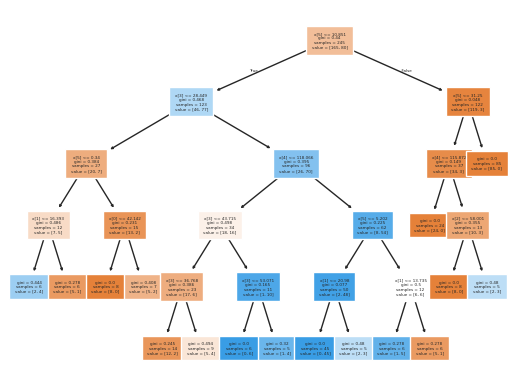

In [ ]:
tree.plot_tree(modeloArbol, filled=True,fontsize=3)
plt.savefig("Mi primer arbol.jpg")
plt.show()

In [ ]:
df.columns

Index(['incidencia pélvica', 'inclinación pélvica',
       'ángulo de lordosis lumbar', 'pendiente sacra', 'radio pélvico',
       'grado de espondilolistesis', 'clase'],
      dtype='object')

In [ ]:
features=df.drop('clase', axis=1)
columnas=features.columns

In [ ]:

print(tree.export_text(modeloArbol,feature_names=['incidencia pélvica', 'inclinación pélvica',\
                                                  'ángulo de lordosis lumbar', 'pendiente sacra', 'radio pélvico',\
                                                  'grado de espondilolistesis']))

|--- grado de espondilolistesis <= 10.85
|   |--- pendiente sacra <= 28.45
|   |   |--- grado de espondilolistesis <= 0.34
|   |   |   |--- inclinación pélvica <= 16.39
|   |   |   |   |--- class: 1
|   |   |   |--- inclinación pélvica >  16.39
|   |   |   |   |--- class: 0
|   |   |--- grado de espondilolistesis >  0.34
|   |   |   |--- incidencia pélvica <= 42.14
|   |   |   |   |--- class: 0
|   |   |   |--- incidencia pélvica >  42.14
|   |   |   |   |--- class: 0
|   |--- pendiente sacra >  28.45
|   |   |--- radio pélvico <= 118.07
|   |   |   |--- pendiente sacra <= 43.72
|   |   |   |   |--- pendiente sacra <= 36.77
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pendiente sacra >  36.77
|   |   |   |   |   |--- class: 0
|   |   |   |--- pendiente sacra >  43.72
|   |   |   |   |--- pendiente sacra <= 53.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pendiente sacra >  53.07
|   |   |   |   |   |--- class: 1
|   |   |--- radio pélvico >  118.07
|   |   |   |--

In [ ]:
import joblib as jb
jb.dump(modeloArbol,"ModeloArbol.bin",compress=True)

['ModeloArbol.bin']

In [ ]:
nuevos_pacientes=[[87.68, 20.37, 93.82, 67.31, 120.94, 76.73],
 [48.26, 16.42, 36.33, 31.84, 94.88, 28.34],
 [38.51, 16.96, 35.11, 21.54, 127.63, 7.99],
 [54.92, 18.97, 51.6, 35.95, 125.85, 2.0]]

In [ ]:
df_nuevos = pd.DataFrame(nuevos_pacientes, columns=columnas)
df_nuevos

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis
0,87.68,20.37,93.82,67.31,120.94,76.73
1,48.26,16.42,36.33,31.84,94.88,28.34
2,38.51,16.96,35.11,21.54,127.63,7.99
3,54.92,18.97,51.60,35.95,125.85,2.00


In [ ]:
df_nuevos.columns

Index(['incidencia pélvica', 'inclinación pélvica',
       'ángulo de lordosis lumbar', 'pendiente sacra', 'radio pélvico',
       'grado de espondilolistesis'],
      dtype='object')

In [ ]:
prediccion=modeloArbol.predict(nuevos_pacientes)
prediccion

array([0, 0, 0, 1])

In [ ]:
probabilidad=modeloArbol.predict_proba(nuevos_pacientes)
probabilidad

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
#Validar el modelo. Datos prueba
y_prect=modeloArbol.predict(X_test)

In [ ]:
#Valor de la variable etiquetada prediccion
y_prect

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
#Valor de la variable etiquetada es el real
y_test.values

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
#Convetir el arreglo y_prect en un dataframe, para verlos en colmunas y filas
y_predictdf=pd.DataFrame(y_prect,columns=["prediccion"])

In [ ]:
y_predictdf

,prediccion
0,0
1,0
2,0
3,1
4,0
...,...
57,1
58,0
59,0
60,0


In [ ]:
y_test_ordenado=y_test.reset_index(drop=True)
# Para resetar el indice de y_test y poner un indice ordinal
#Recordar que y_test es lo "real" es decir lo histórico

In [ ]:
#Unir el dataframe y_test_ordenado con el y_predictdf
#recordar que tienen el mismo indice
comparativo=pd.concat([y_test_ordenado,y_predictdf],axis=1)
comparativo.head(20)

,clase,prediccion
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,0
6,0,0
7,0,1
8,1,1
9,1,0


In [ ]:
modeloArbol.score(X_test,y_test)

0.7741935483870968

In [ ]:
#Se crea una tabla con los datos de la matriz
matrix=confusion_matrix(y_test,y_prect)
matrix

array([[39,  3],
       [11,  9]])

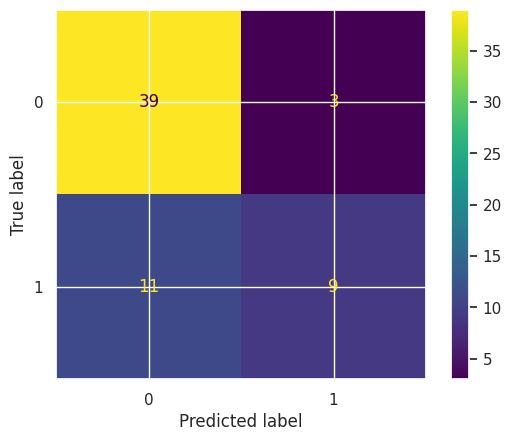

In [ ]:
#Grafica la matriz
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloArbol.classes_)
mostrarMatrix.plot()

In [ ]:
#Accuracy es que tan bueno es el modelo en general
#Precision es que tan bueno es el modelo para predecir una clase
print(classification_report(y_test,y_prect))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        42
           1       0.75      0.45      0.56        20

    accuracy                           0.77        62
   macro avg       0.77      0.69      0.71        62
weighted avg       0.77      0.77      0.76        62



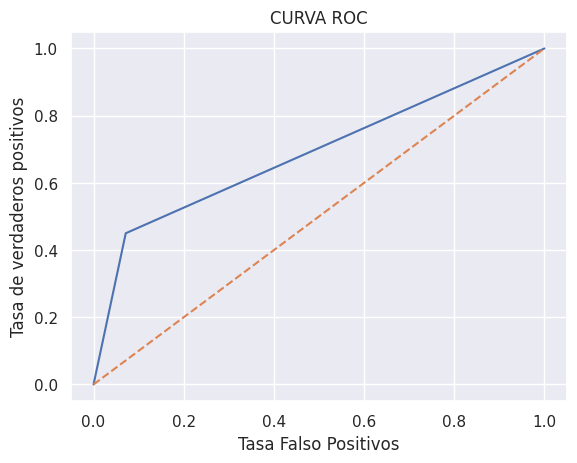

In [ ]:
fpr,tpr,umbral=roc_curve(y_test,y_prect)
#graficar la curva ROC
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [ ]:
#Area bajo la curva
print ("Area bajo la curva", auc(fpr,tpr))

Area bajo la curva 0.6892857142857143


In [ ]:
from sklearn.ensemble import RandomForestClassifier #Clasificación
# from sklearn.ensemble import RandomForestRegressor #Regresión
from sklearn.metrics import classification_report, accuracy_score

# Aquí asumo que ya tienes tus datos cargados en X y y
# X = Características (features)
# y = Etiquetas (target)

# Split de los datos (esto ya lo tienes en tu código)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=454, stratify=df.clase)  # O test_size=0.2

# Crear el modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Imprimir cuántos árboles ha utilizado el modelo
print(f"El modelo utiliza {rf_model.n_estimators} árboles.")

# Predecir sobre los datos de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df.clase.unique(), yticklabels=df.clase.unique())
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [ ]:
# Crear el modelo de Bosque Aleatorio con características aleatorias, bootstrap y OOB activado
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_features='log2',      # Usar la raíz cuadrada del número de características
    criterion='gini',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,           # Habilitar bootstrap (muestras aleatorias con reemplazo)
    oob_score=True            # Activar Out-Of-Bag (evaluación de muestras no usadas en el entrenamiento)
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Imprimir cuántos árboles ha utilizado el modelo
print(f"El modelo utiliza {rf_model.n_estimators} árboles.")
print(f"Evaluación OOB (fuera de la bolsa): {rf_model.oob_score_:.4f}")

# Predecir sobre los datos de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Asumiendo que ya tienes los datos X, y, y la división de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=454, stratify=df.clase)

# Definir el clasificador de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500, 1000],  # Número de árboles
    'max_features': ['log2', 'sqrt', None],           # Número de características a usar por árbol
    'criterion': ['gini', 'entropy'],                 # Criterio de división
    'bootstrap': [True, False],                        # Habilitar bootstrap
    'oob_score': [True, False]                         # Evaluación de muestras fuera de la bolsa (OOB)
}

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor accuracy
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor accuracy de validación: {grid_search.best_score_:.4f}")

# Usar el mejor modelo encontrado para predecir sobre los datos de prueba
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluar el modelo en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la tabla de resultados del GridSearch ordenada por accuracy
results = pd.DataFrame(grid_search.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False)
print("\nResultados del GridSearch (ordenados por accuracy):")
print(results)


In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df.clase.unique(), yticklabels=df.clase.unique())
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [ ]:
# Imprimir cada uno de los árboles
n_trees = rf_model.n_estimators  # Número de árboles en el bosque
for i in range(n_trees):
    plt.figure(figsize=(15, 10))
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=X.columns, class_names=[str(i) for i in rf_model.classes_])
    plt.title(f"Árbol {i + 1}")
    plt.show()

#Crear el modelo de crossvalidation ,para verificar la consistencia del modelo entrenado.

In [ ]:
#Librerias de validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloArbol,X_train,y_train, cv=Kpliegues)
print("Score Naive Bayes con Cross Validation",scores)
print("Promedio de los scores",scores.mean())
print("Varianza de los scores",scores.var())
print("Numero de pliegues usados",len(scores))

In [ ]:
cross_val_predict(modeloArbol,X_train,y_train, cv=Kpliegues)

In [ ]:
y_train

# Balancear los datos

In [ ]:
y_train.value_counts()

In [ ]:
y_train.plot.hist()

Submuestreo
Para aplicar la técnica de muestreo insuficiente, utilizaremos el algoritmo RandomUnderSampler, que elimina aleatoriamente las instancias. Está disponible en la biblioteca de aprendizaje desequilibrado.


Ahora crearemos un objeto RandomUnderSampler con el estado aleatorio establecido en 42. Esto garantiza que la selección aleatoria sea reproducible cuando se ejecuta el código varias veces. También podemos establecer la estrategia de muestreo como ‘ mayoría ’, donde solo la clase mayoritaria tendrá instancias eliminadas. Los diversos parámetros disponibles se pueden encontrar en el documentación.

Finalmente, aplicaremos la técnica RandomUnderSampling a los datos de entrada. La función fit_resample se adapta al objeto RandomUnderSampler a los datos y devuelve los datos equilibrados.

In [ ]:
# Importar las librerías necesarias
from imblearn.under_sampling import RandomUnderSampler
# Crear un objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'auto')
# Balancear datos
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(len(y_resampled))
print(y_resampled.value_counts())
y_resampled.plot.hist()

In [ ]:
# Import the necessary libraries
from imblearn.under_sampling import RandomUnderSampler
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42, sampling_strategy = 0.9)
# Balancing the data
X_resampled, y_X_resampled = rus.fit_resample(X_train, y_train)

print(len(y_X_resampled))
print(y_X_resampled.value_counts())
y_X_resampled.plot.hist()

Sobremuestreo
Para el sobremuestreo, usaremos SMOTE, que es una técnica ampliamente utilizada en problemas de clasificación donde la clase minoritaria es significativamente más pequeña que la clase mayoritaria. La técnica funciona seleccionando un ejemplo de la clase minoritaria y encontrando a sus vecinos más cercanos. Luego crea nuevos ejemplos sintéticos al interpolar aleatoriamente los atributos de los ejemplos seleccionados y agregarlos al conjunto de datos.

Para usarlo, importaremos las bibliotecas necesarias.

Del mismo modo, crearemos una instancia del objeto SMOTE, que se aplicará a los datos de capacitación para realizar el sobremuestreo y equilibrar los datos.


In [ ]:
# Importar las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
# Crear una instancia de SMOTE

smote = SMOTE ( )

# Equilibrando los datos
X_resampled, y_resampled = smote.fit_resample ( X_train, y_train )

print(len(y_resampled))
print(y_resampled.value_counts())
y_resampled.plot.hist()

In [ ]:
#Entrenamiento
from sklearn.naive_bayes import GaussianNB
modeloNB=GaussianNB()
modeloNB.fit(X_resampled, y_resampled)

#Evaluación
print("Score de predicción", modeloNB.fit(X_resampled, y_resampled).predict_proba(X_test))
# Sin cros validation

print("Accuracy para los datos de entrenamiento", modeloNB.score(X_resampled, y_resampled)*100)
print("Accuracy para los datos de prueba",modeloNB.score(X_test,y_test)*100)

#Con cross validation

print("Accuracy para crossValidation", cross_val_score(modeloNB,
                                                       X_resampled.values,
                                                       y_resampled.values,
                                                       cv=5).mean())

rcv=cross_val_score(modeloNB, X_resampled.values, y_resampled.values, cv=5)
print("Resultados del Accuracy para crossValidation en cada iteracción",rcv)
print("%0.2f Accuracy con una desviación estandar de %0.2f" % (rcv.mean(), rcv.std()))

resultado=[["Naive Bayes",modeloNB.score(X_resampled, y_resampled)*100,modeloNB.score(X_test,y_test)*100]]

#Predicción con los datos de prueba
y_predict=modeloNB.predict(X_test)
print("Reporte del Score del modelo",classification_report(y_test,y_predict))


#Comparar los resultado
y_predict_df=pd.DataFrame(y_predict,columns=["prediccion"])


y_test_ordena= y_test.reset_index(drop=True)

comparativo=pd.concat([y_test_ordena,y_predict_df], axis=1)
print(comparativo.head(20))


#matrix de confusión para analizar los errores de predicción
matrix=confusion_matrix(y_test,y_predict,labels=modeloNB.classes_)
displaymatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloNB.classes_)
displaymatrix.plot(xticks_rotation='vertical')
plt.show()

#La corva Roc



fpr, tpr, thresholds = roc_curve(y_test, y_predict)

#Plotear la curva ROC

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [ ]:
import joblib as jb
jb.dump(modeloNB,"modeloNB.bin",compress=True)